<h3 align="right">STR, &nbsp; dSPN, &nbsp; (e) 150917_c10_D1, &nbsp; (m) WT-P270-20 <br> </h3>

# Model selection

## Model data

In [2]:
import cell_model, cell_evaluator
morphofile = 'morphology/WT-P270-20-15ak-cor.swc'
parameters = cell_model.define_parameters('parameters.json')
mechanisms = cell_model.define_mechanisms('mechanisms.json')
protocols  = cell_evaluator.define_protocols('protocols-val.json')
calculator = cell_evaluator.define_fitness_calculator(protocols, 'features-val.json')
'''
expdata = {
    'IV_505.soma.v': 'expdata/ECBL_IV_ch3_505.dat',
    'IV_509.soma.v': 'expdata/ECBL_IV_ch3_509.dat',
    'IDthresh-sub_547.soma.v': 'expdata/ECBL_IDthresh_ch3_547.dat',
    'IDthresh_548.soma.v': 'expdata/ECBL_IDthresh_ch3_548.dat',
    'IDthresh_549.soma.v': 'expdata/ECBL_IDthresh_ch3_549.dat',
    'IDthresh_550.soma.v': 'expdata/ECBL_IDthresh_ch3_550.dat'
}'''
expdata = {'IDthresh-sub_547.soma.v': 'expdata/ECBL_IDthresh_ch3_547.dat',}
for p in protocols:
    key = '%s.soma.v' % (p)
    t, i = p.split('_')
    t = t.replace('-sub', '')
    val = 'expdata/ECBL_%s_ch3_%s.dat' % (t,i)
    expdata[key] = val
    print key, '\t', val

IV_514.soma.v 	expdata/ECBL_IV_ch3_514.dat
IV_515.soma.v 	expdata/ECBL_IV_ch3_515.dat
IV_516.soma.v 	expdata/ECBL_IV_ch3_516.dat
IV_510.soma.v 	expdata/ECBL_IV_ch3_510.dat
IV_511.soma.v 	expdata/ECBL_IV_ch3_511.dat
IV_512.soma.v 	expdata/ECBL_IV_ch3_512.dat
IV_513.soma.v 	expdata/ECBL_IV_ch3_513.dat
IDthresh_552.soma.v 	expdata/ECBL_IDthresh_ch3_552.dat
IDthresh_553.soma.v 	expdata/ECBL_IDthresh_ch3_553.dat
IDthresh_550.soma.v 	expdata/ECBL_IDthresh_ch3_550.dat
IDthresh_551.soma.v 	expdata/ECBL_IDthresh_ch3_551.dat
IDthresh_556.soma.v 	expdata/ECBL_IDthresh_ch3_556.dat
IDthresh_557.soma.v 	expdata/ECBL_IDthresh_ch3_557.dat
IDthresh_554.soma.v 	expdata/ECBL_IDthresh_ch3_554.dat
IDthresh_555.soma.v 	expdata/ECBL_IDthresh_ch3_555.dat
IDthresh_558.soma.v 	expdata/ECBL_IDthresh_ch3_558.dat
IDthresh_559.soma.v 	expdata/ECBL_IDthresh_ch3_559.dat
IV_507.soma.v 	expdata/ECBL_IV_ch3_507.dat
IV_506.soma.v 	expdata/ECBL_IV_ch3_506.dat
IV_505.soma.v 	expdata/ECBL_IV_ch3_505.dat
IV_509.soma.v 	expda

## Simulation environment

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt

In [4]:
import json
import pandas
import efel
import numpy as np
import bluepyopt as bpopt
import bluepyopt.ephys as ephys

In [5]:
from utils import *

In [6]:
!rm -rf x86_64
!nrnivmodl mechanisms

Creating x86_64 directory for .o files.

/home/HDD-drive/Repos/Neuron/Alex_SPN_models
mechanisms/bk.mod mechanisms/cadyn.mod mechanisms/cal12.mod mechanisms/cal13.mod mechanisms/caldyn.mod mechanisms/can.mod mechanisms/car.mod mechanisms/cav32.mod mechanisms/cav33.mod mechanisms/kaf.mod mechanisms/kas.mod mechanisms/kir.mod mechanisms/naf.mod mechanisms/sk.mod mechanisms/tmglut.mod
bk.mod cadyn.mod cal12.mod cal13.mod caldyn.mod can.mod car.mod cav32.mod cav33.mod kaf.mod kas.mod kir.mod naf.mod sk.mod tmglut.mod
"/home/HDD-drive/neuron/nrn/x86_64/bin/nocmodl" bk
Translating bk.mod into bk.c
Thread Safe
"/home/HDD-drive/neuron/nrn/share/nrn/libtool" --tag=CC --mode=compile mpicc -DHAVE_CONFIG_H  -I. -I.. -I"/home/HDD-drive/neuron/nrn/include/nrn" -I"/home/HDD-drive/neuron/nrn/x86_64/lib"      -g -O2 -c -o bk.lo bk.c
libtool: compile:  mpicc -DHAVE_CONFIG_H -I. -I.. -I/home/HDD-drive/neuron/nrn/include/nrn -I/home/HDD-drive/neuron/nrn/x86_64/lib -g -O2 -c bk.c  -fPIC -DPIC -o .libs/bk.o

"/home/HDD-drive/neuron/nrn/share/nrn/libtool" --tag=CC --mode=link mpicc -module  -g -O2    -o libnrnmech.la -rpath "/home/HDD-drive/neuron/nrn/x86_64/lib"  bk.lo cadyn.lo cal12.lo cal13.lo caldyn.lo can.lo car.lo cav32.lo cav33.lo kaf.lo kas.lo kir.lo naf.lo sk.lo tmglut.lo mod_func.lo  -L"/home/HDD-drive/neuron/nrn/x86_64/lib" -lnrnoc -loc -lmemacs -lnrnmpi -lscopmath -lsparse13 -lreadline -lncurses -L"/home/HDD-drive/neuron/nrn/x86_64/lib" "/home/HDD-drive/neuron/nrn/x86_64/lib/libnrniv.la" -livoc -lneuron_gnu -lmeschach -lsundials       -lm -ldl
libtool: link: mpicc -shared  -fPIC -DPIC  .libs/bk.o .libs/cadyn.o .libs/cal12.o .libs/cal13.o .libs/caldyn.o .libs/can.o .libs/car.o .libs/cav32.o .libs/cav33.o .libs/kaf.o .libs/kas.o .libs/kir.o .libs/naf.o .libs/sk.o .libs/tmglut.o .libs/mod_func.o   -Wl,-rpath -Wl,/home/HDD-drive/neuron/nrn/x86_64/lib -Wl,-rpath -Wl,/home/HDD-drive/neuron/nrn/x86_64/lib -L/home/HDD-drive/neuron/nrn/x86_64/lib /home/HDD-drive/neuron/nrn/x86_64/lib/lib

## Cell model definition

In [7]:
morphology = ephys.morphologies.NrnFileMorphology(
    morphofile, do_replace_axon=True)

In [8]:
### this code is (slighlty updated) from the BluePyOpt/examples/expsyn/ExpSyn.ipynb notebook:
# https://github.com/BlueBrain/BluePyOpt/blob/master/examples/expsyn/ExpSyn.ipynb

# NEURON simulator
nrn_sim = ephys.simulators.NrnSimulator()

# Object that points to sectionlist somatic
somatic_loc = ephys.locations.NrnSeclistLocation('somatic',seclist_name='somatic')

# Object that points to the center of the soma
somacenter_loc = ephys.locations.NrnSeclistCompLocation(
    name='somacenter',
    seclist_name='somatic',
    sec_index=0,
    comp_x=0.5)


# Add ExpSyn synapse pointprocess at the center of the soma
expsyn_mech = ephys.mechanisms.NrnMODPointProcessMechanism(                     
    name='expsyn',                                                              
    suffix='ExpSyn',                                                            
    locations=[somacenter_loc])

expsyn_mech.tau1 = 2.2
expsyn_mech.tau2 = 12.0
expsyn_mech.e    = 0

# Once we have defined a point process, we can create a Location object that points to it
expsyn_loc = ephys.locations.NrnPointProcessLocation(                           
    'expsyn_loc',                                                               
    pprocess_mech=expsyn_mech)



In [9]:
cell = ephys.models.CellModel(
    'dspn', 
    morph=morphology, 
    mechs=mechanisms+[expsyn_mech], 
    params=parameters)
print cell

dspn:
  morphology:
    morphology/WT-P270-20-15ak-cor.swc
  mechanisms:
    naf.basal: naf at ['basal']
    kaf.basal: kaf at ['basal']
    kas.basal: kas at ['basal']
    kir.basal: kir at ['basal']
    pas.all: pas at ['all']
    naf.somatic: naf at ['somatic']
    kaf.somatic: kaf at ['somatic']
    kas.somatic: kas at ['somatic']
    kir.somatic: kir at ['somatic']
    can.somatic: can at ['somatic']
    car.somatic: car at ['somatic']
    cadyn.somatic: cadyn at ['somatic']
    sk.somatic: sk at ['somatic']
    bk.somatic: bk at ['somatic']
    expsyn: ExpSyn at ['somatic[0](0.5)']
  params:
    celsius: celsius = 35
    v_init: v_init = -85
    g_pas.all: ['all'] g_pas = [1e-05, 0.001]
    e_pas.all: ['all'] e_pas = [-80, -60]
    cm.axonal: ['axonal'] cm = 1
    cm.somatic: ['somatic'] cm = 1
    cm.basal: ['basal'] cm = 2.44
    Ra.all: ['all'] Ra = [200, 300]
    ek.somatic: ['somatic'] ek = -105.9
    ek.basal: ['basal'] ek = -105.9
    gbar_kir.somatic: ['somatic'] gbar_kir

In [ ]:
# Now we need to define the fitness function. 
# (The idea is to stimulate the synapse 5 times, and let the resulting train of EPSPs reach exactly -50 mV) 
# no optimization used.

#We first create a stimulus that injects the presynaptic events:
stim_start = 20
number = 5
interval = 5

netstim = ephys.stimuli.NrnNetStimStimulus(                                  
    total_duration=200,                                                      
    number=5,                                                                
    interval=5,                                                              
    start=stim_start,                                                        
    weight=5e-4,                                                             
    locations=[expsyn_loc])

stim_end = stim_start + interval * number

rec = ephys.recordings.CompRecording(
    name='soma.v', 
    location=somacenter_loc,
    variable='v')

protocol = ephys.protocols.SweepProtocol('netstim_protocol', [netstim], [rec])

In [8]:
opt_params = [p.name for p in cell.params.values() if not p.frozen]
for x in sorted(opt_params): print x

Ra.all
e_pas.all
g_pas.all
gbar_bk.somatic
gbar_kaf.basal
gbar_kaf.somatic
gbar_kas.basal
gbar_kas.somatic
gbar_kir.basal
gbar_kir.somatic
gbar_naf.basal
gbar_naf.somatic
gbar_sk.somatic


## Cell evaluator

In [9]:
simulator = ephys.simulators.NrnSimulator()

In [10]:
evaluator = ephys.evaluators.CellEvaluator(
    cell_model=cell,
    param_names=opt_params,
    fitness_protocols=protocols,
    fitness_calculator=calculator,
    sim=simulator)

## Optimisation results

In [11]:
with open('log.json') as fp:
    log = json.load(fp)

In [12]:
#plot_log(log)

In [13]:
best_models = json.load(open('best_models.json'))
#pandas.DataFrame(best_models).T

In [14]:
evaluate_all = True
best_objectives = []
if evaluate_all:
    for params in best_models:
        objectives = evaluator.evaluate_with_dicts(params)
        best_objectives.append(objectives)
    df = pandas.DataFrame(best_objectives).T
    df = df.sort_index(axis=0, ascending=False)

In [15]:
#if evaluate_all:
#    plot_scores(df, figsize=(6,8))

## Single-cell simulation

In [16]:
ind = 3 # 3, 1, 2, 5, 6
test_parameters = best_models[ind]

In [17]:
test_responses = evaluator.run_protocols(
    protocols=protocols.values(), 
    param_values=test_parameters)

<IPython.core.display.Javascript object>


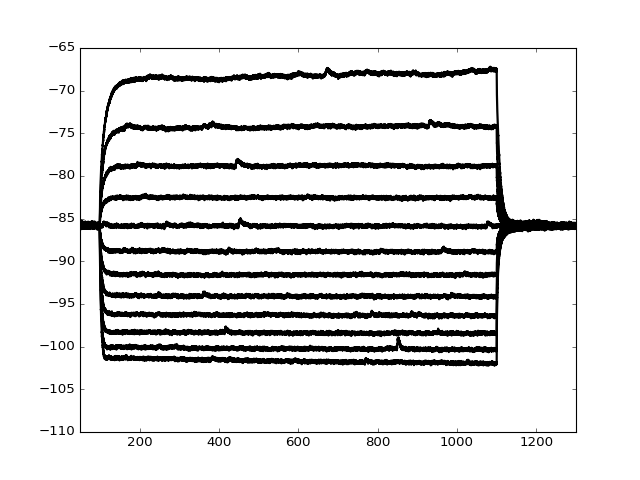

<IPython.core.display.Javascript object>


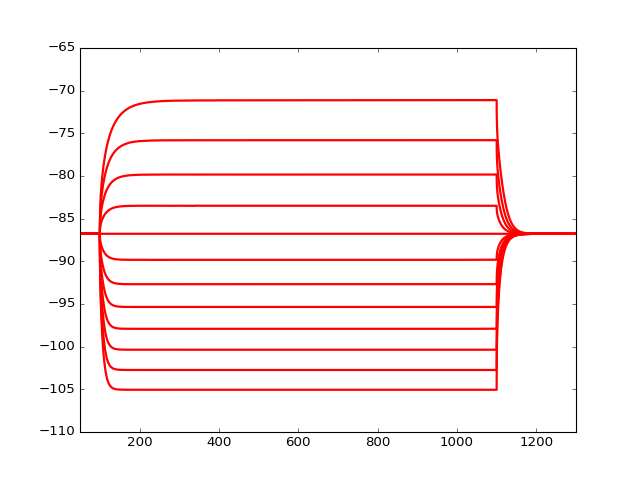

<IPython.core.display.Javascript object>


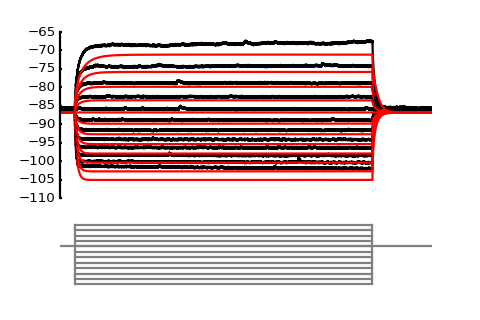

<IPython.core.display.Javascript object>


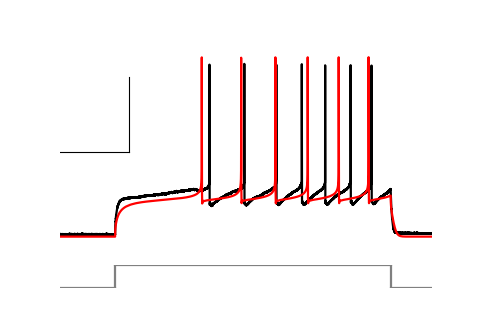

<IPython.core.display.Javascript object>


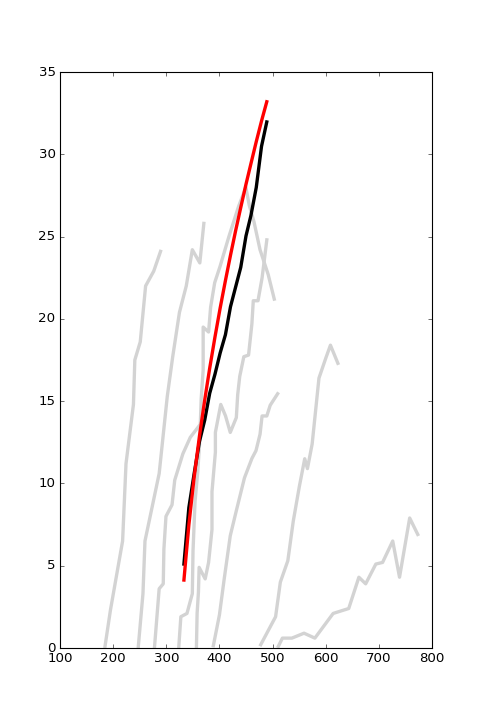

<IPython.core.display.Javascript object>


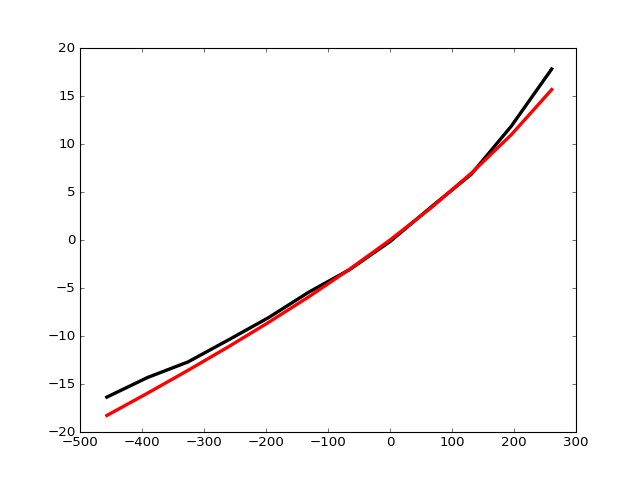

<IPython.core.display.Javascript object>


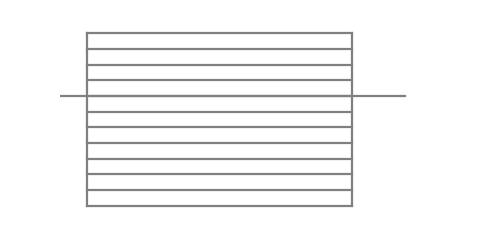

<IPython.core.display.Javascript object>


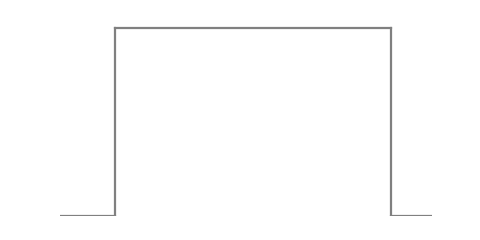

In [168]:
def getSpikedata_x_y(x,y, threshold=0.0):
    ''' 
    There's probably a Neuron function for this (e.g. netcon)--use instead? 
    
    getSpikedata_x_y(x,y) -> return spike times as a list
    
    Extracts and returns the spikes from spike trace data.
    
    extraction algorithm:
    -extract list containing index for all points in y larger than threshold.
    -sorts out the index(es) that are the first one(s) crossing the threshold, i.e. the 
        first index of each spike, and stores the timing of the event (x[index]). 
    This is done by looping over all index and check if the index is equal to the previous 
        index + 1. 
    If not it is the first index of a spike.
        
    If no point is above threshold in the trace the function returns an empty list [].
    
    x           = time vector
    y           = vm vector
    threshold   = min amplitude used for spike detection.
                  If the amplitude of the spike is lower than threshold spikes won't be
                    detected.
                  If the Threshold is not crossed in the repolarizing phase, no new spike 
                    can be detected.
    '''
    
    #count = 0
    spikes = []
    
    # pick out index for all points above zero potential for potential trace
    spikeData = [i for i,v in enumerate(y) if v > threshold]

    # if no point above 0
    if len(spikeData) == 0:
        
        return spikes

    else:
        # pick first point of each individual transient (spike)...
        for j in range(0, len(spikeData)-1):
            if j==0:
                
                #count += 1
                spikes.append(x[spikeData[j]])

            # ...by checking above stated criteria
            elif not spikeData[j] == spikeData[j-1]+1:
                #count += 1
                spikes.append(x[spikeData[j]])
            
    return spikes 



def get_voltage_deflection(t, y, t_startstim=100, t_endstim=1100, dur=200):
    
    # get base value index
    init = next(i for i,x in enumerate(t) if x >= t_startstim) -1
    
    # get index of time trace (default stim ends = 1100 ms and stimulation length is last 200 ms)
    iend = next(i for i,x in enumerate(t) if x >= t_endstim) - 1
    istart = next(i for i,x in enumerate(t) if x >= t_endstim-dur)
    
    # return mean over interval def by [istart, iend]
    return [y[init], np.mean(y[istart:iend])]
    
    
def def_axis(ax, axis=['left'], tpw=2, tpl=2):
    
    ax.tick_params(width=tpw, length=tpl) 
    
    for side in ['left', 'right', 'top', 'bottom']:
        
        if side in axis:
            ax.yaxis.set_ticks_position(side)
            ax.spines[side].set_linewidth(tpl)
        else:
            ax.spines[side].set_visible(False)
    
    if not 'top' in axis and not 'bottom' in axis:
        ax.set_xticks([])
    if not 'left' in axis and not 'right' in axis:
        ax.set_yticks([])
    
     
        

def plot_function(responses, expdata=[], junction_potential=0):
    
    fs = (6,4)
    f_IV_exp, a_IV_exp = plt.subplots(1,1)
    f_IV_sim, a_IV_sim = plt.subplots(1,1)
    f_IV_both, a_IV_both = plt.subplots(2,1, figsize=fs, gridspec_kw = {'height_ratios':[5, 2]})
    f_Th, a_Th         = plt.subplots(2,1, figsize=fs, gridspec_kw = {'height_ratios':[9, 1]})
    f_FI, a_FI         = plt.subplots(1,1, figsize=(6,9))
    f_IV, a_IV         = plt.subplots(1,1)
    
    # stimulation paradigm
    f_IV_stim, a_IV_stim = plt.subplots(1,1, figsize=(6,3))
    f_Th_stim, a_Th_stim = plt.subplots(1,1, figsize=(6,3))
    
    ax_IV      = {'exp':a_IV_exp, 'sim':a_IV_sim}
    #ax_Th     = {'exp':a_Th_exp, 'sim':a_Th_sim}
    color      = {'exp':'black',  'sim':'red'}
    SPIKES     = {'exp':[], 'sim':[], 'I':[]}
    POTENTIAL  = {'exp':[], 'sim':[], 'I':[]}
    DEFLECTION = {'exp':[], 'sim':[], 'I':[]}      
    
    lw         = 2
    
    first_spiking = {'exp':True,  'sim':True}
    
    for index, (name, response) in enumerate(sorted(responses.items())):
        
        for tech in ['exp','sim']:
                
            if tech == 'exp':
                time,voltage = np.loadtxt(expdata[name], unpack=True)
                voltage = voltage - junction_potential
                n = name.split('.')[0]
                I = float(protocols[n].stimuli[0].step_amplitude)*1000
                if 'IV' in name:
                    POTENTIAL[ 'I'].append( I )
                    DEFLECTION['I'].append( I )
                else:
                    SPIKES['I'].append( I )
            else:
                time = response['time']
                voltage = response['voltage']
            
            if 'IV' in name:
                ax_IV[tech].plot( time, voltage, color=color[tech], lw=lw)
                a_IV_both[0].plot(time, voltage, color=color[tech], lw=lw)
                # get voltage deflection for IV curve
                vinit,vend = get_voltage_deflection(time, voltage) 
                POTENTIAL[tech].append(vend)
                DEFLECTION[tech].append(vend-vinit)
            else:
                # extract spikes
                spikes = getSpikedata_x_y(time, voltage)
                if len(spikes) == 0:
                    SPIKES[tech].append( 0 )
                else: 
                    SPIKES[tech].append( 1000.0*(len(spikes)-1)/(spikes[-1]-spikes[0]) )
                    if first_spiking[tech]:
                        #ax_Th[tech].plot(time, voltage, color=color[tech], lw=lw)
                        a_Th[0].plot(       time, voltage, color=color[tech], lw=lw)
                        first_spiking[tech] = False
                
                        
    # import planert and plot in grey: TODO create FI for all experimental data
    import glob
    for i,f in enumerate(glob.glob('../D1-MSN_wip/Exp_data/FI/*D1*') ):
        [x_i,y_i] = np.loadtxt(f, unpack=True)
        a_FI.plot(x_i, y_i, color='lightgrey', lw=3)
    '''
    for i,f in enumerate(glob.glob('../D1-MSN_wip/Exp_data/FI/*D2*') ):
        [x_i,y_i] = np.loadtxt(f, unpack=True)
        a4.plot(x_i, y_i, color='lightgrey', lw=3)'''
    
    # get current for these stim
    a_FI.plot(SPIKES['I'], SPIKES['exp'], color=color['exp'], lw=3)
    a_FI.plot(SPIKES['I'], SPIKES['sim'], color=color['sim'], lw=3)
    a_IV.plot(DEFLECTION['I'], DEFLECTION['exp'], color=color['exp'], lw=3)
    a_IV.plot(DEFLECTION['I'], DEFLECTION['sim'], color=color['sim'], lw=3)
    
    ya=-30
    xa=700
    shift=100
    xl=500
    yl=50
    for ax in [a_Th[0]]:
        ax.plot([xa-xl+shift,xa+shift],[ya,ya], color='black')
        ax.plot([xa+shift,xa+shift],[ya,ya+yl],  color='black')
        ax.axis('off')
        ax.set_ylim([-90,50])
        ax.set_xlim([xa-xl+shift,xa+2000+300])
        
    # plot stimulation
    lwstim=2
    for ax in [a_Th_stim, a_Th[1]]:
        ax.plot([xa-xl, xa], [0, 0], 'grey', lw=lwstim)
        ax.plot([xa,  xa], [0, SPIKES['I'][1]], 'grey', lw=lwstim)
        ax.plot([xa, xa+2000], [SPIKES['I'][1],SPIKES['I'][1]], 'grey', lw=lwstim)
        ax.plot([xa+2000,xa+2000], [SPIKES['I'][1], 0], 'grey', lw=lwstim)
        ax.plot([xa+2000,xa+2000+300], [0, 0], 'grey', lw=lwstim)
        ax.axis('off')
        ax.set_xlim([xa-xl+shift,xa+2000+300])
        
    for ax in [a_IV_stim, a_IV_both[1]]:
        for I in DEFLECTION['I']:
            ax.plot([100, 1100], [I,I], 'grey', lw=lwstim)
        ax.plot([0, 1300], [0,0], 'grey', lw=lwstim)
        ax.plot([100, 100],   [min(DEFLECTION['I']),max(DEFLECTION['I'])], 'grey', lw=lwstim)
        ax.plot([1100, 1100], [min(DEFLECTION['I']),max(DEFLECTION['I'])], 'grey', lw=lwstim)
        ax.axis('off')
        
    for ax in ax_IV:
        #ax.plot([100, 550], [0, 0], 'k', lw=6)
        #ax.plot([100, 100], [25, 30], 'k', lw=3)
        #ax.plot([100, 200], [30, 30], 'k', lw=3)
        ax_IV[ax].set_xlim([50,1300])
        ax_IV[ax].set_ylim([-110,-65])
        #def_axis(ax_IV[ax], axis=['left'], tpw=2, tpl=4)
        #ax.axis('off')
    for ax in a_IV_both:
        ax.set_xlim([50,1300])
    a_IV_both[0].set_ylim([-110,-65])
    def_axis(a_IV_both[0], axis=['left'], tpw=2, tpl=2)
    
    f_IV_exp.savefig('IV_exp_curve_dspn.pdf', transparent=True)
    f_IV_sim.savefig('IV_sim_curve_dspn.pdf', transparent=True)
    f_Th.savefig('Th_curve_dspn.pdf', transparent=True)
    f_FI.savefig('IF_curve_dspn.pdf', transparent=True)
    f_IV.savefig('IV_extracted_curve_dspn.pdf', transparent=True)
    f_IV_stim.savefig('IV_stim_dspn.pdf', transparent=True)
    f_IV_both.savefig('IV_both_curve_dspn.pdf', transparent=True)
                      
    
plot_function(test_responses, expdata=expdata, junction_potential=9.5)

In [1]:
# get compartment (soma)
print cell.icell
# set synapse (follow Johannes example)

# check dynamics

NameError: name 'cell' is not defined

<IPython.core.display.Javascript object>


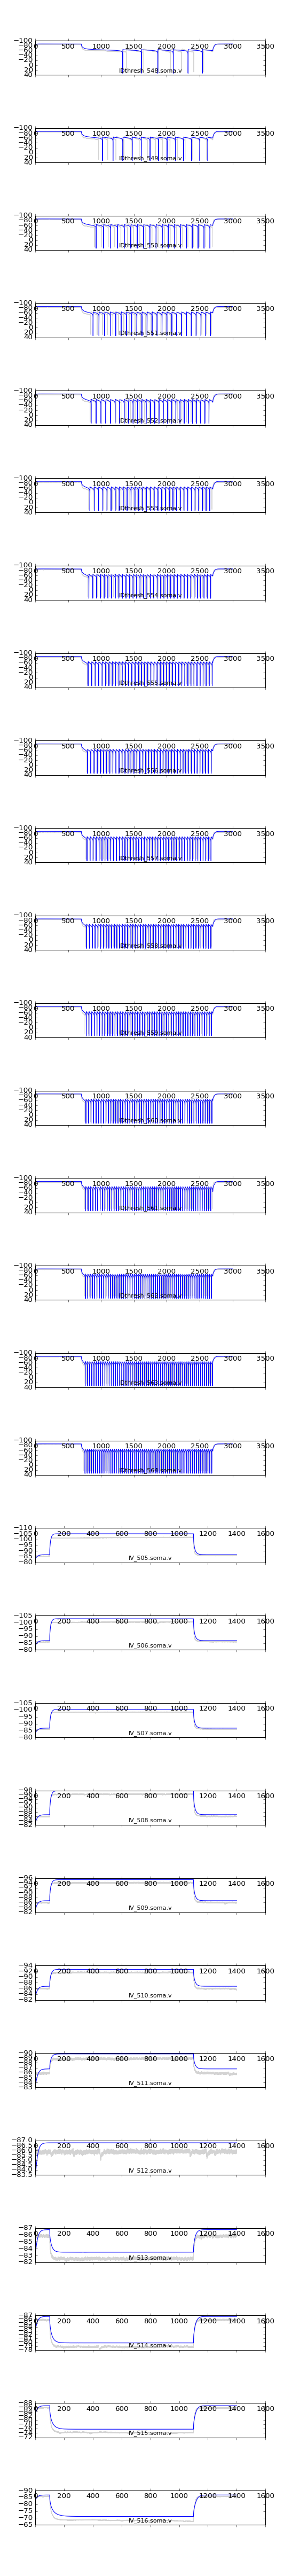

In [115]:
plot_responses(test_responses, expdata=expdata, junction_potential=9.5, figsize=(6,12))

<IPython.core.display.Javascript object>


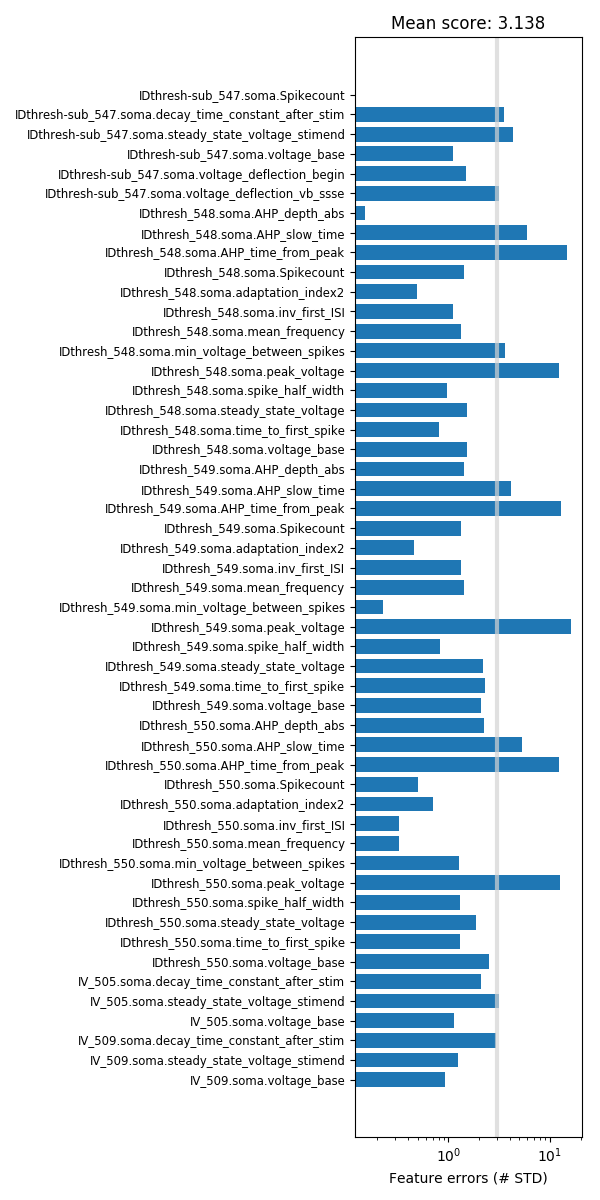

In [19]:
if evaluate_all:
    objectives = best_objectives[ind]
else:
    objectives = evaluator.evaluate_with_dicts(test_parameters)
plot_objectives(objectives, figsize=(6,12))

In [20]:
from numpy.linalg import norm
d = []
for i in range(len(best_models)):
    v = []
    for j in range(len(best_models)):
        p1 = np.array([best_models[i][p] for p in sorted(best_models[i])])
        p2 = np.array([best_models[j][p] for p in sorted(best_models[j])])
        v.append(norm((p1-p2)/(p1+p2)))
    d.append(v)
df = pandas.DataFrame(data=np.round(d,2))
df

0     1     2     3     4     5     6     7     8     9
0  0.00  1.37  1.53  1.79  1.90  1.57  1.40  1.54  1.28  1.48
1  1.37  0.00  1.37  1.32  1.71  1.34  1.11  1.62  1.31  1.44
2  1.53  1.37  0.00  1.51  1.87  0.95  1.40  1.69  1.50  1.29
3  1.79  1.32  1.51  0.00  2.11  1.45  1.48  1.96  1.78  1.45
4  1.90  1.71  1.87  2.11  0.00  1.90  1.52  1.61  1.83  2.09
5  1.57  1.34  0.95  1.45  1.90  0.00  1.44  1.85  1.73  1.51
6  1.40  1.11  1.40  1.48  1.52  1.44  0.00  1.68  1.64  1.66
7  1.54  1.62  1.69  1.96  1.61  1.85  1.68  0.00  1.00  1.54
8  1.28  1.31  1.50  1.78  1.83  1.73  1.64  1.00  0.00  1.14
9  1.48  1.44  1.29  1.45  2.09  1.51  1.66  1.54  1.14  0.00

In [21]:
selected = [3, 1, 2, 5, 6]   # from range(10)

In [22]:
hall_of_fame = []
for model in selected:
    hall_of_fame.append(best_models[model])
with open('hall_of_fame.json', 'w') as fp:
    json.dump(hall_of_fame, fp, indent=4, sort_keys=True)

In [23]:
with open('best_parameters.json', 'w') as fp:
    json.dump(test_parameters, fp, indent=4, sort_keys=True)